In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math

In [2]:
def agglomerativeClustring(x,n_clusters):
    #,affinity='euclidean',linkage='single_linke'
    #initialize cluster numbers,avalable cluster set, infinite row and disimiliarity matrix
    cluster_number=np.zeros_like(x[:,0])
    infiniteRow=np.zeros_like(x[:,0])
    avclusters=set()
    dsimMatrix=np.zeros((x.shape[0],x.shape[0]))
    for i in range(cluster_number.shape[0]):
        cluster_number[i]=i
        infiniteRow[i]=math.inf
        avclusters.add(i)
        dsimMatrix[i,:]=np.linalg.norm(x[i,:]-x,axis=1)
        dsimMatrix[i,i]=math.inf
    while len(avclusters)>n_clusters:
        argmin=np.unravel_index(np.argmin(dsimMatrix, axis=None), dsimMatrix.shape)
        cn=cluster_number[argmin[1]]
        clist=cluster_number==cn
        cluster_number[clist]=argmin[0]
        avclusters.remove(argmin[1])
        dsimMatrix[argmin[1],:]=infiniteRow
        dsimMatrix[:,argmin[1]]=infiniteRow
        row=single_link(x,cluster_number,argmin[0])
        dsimMatrix[argmin[0],:]=row
        dsimMatrix[:,argmin[0]]=row
    return cluster_number

In [3]:
def single_link(x,cluster_number,index):
    row=np.zeros((x.shape[0]))
    cn=cluster_number[index]
    dataCluster=x[cluster_number==cn]
    for i in range(x.shape[0]):
        cind=cluster_number[i]
        clist=cluster_number==cind
        dc=x[clist]
        if i!=np.min(np.where(clist==True)):
            row[i]=0.
        else:
            mini=math.inf
            for j in range(dc.shape[0]):
                mini=np.minimum(mini,np.min(np.linalg.norm(dc[j,:]-dataCluster,axis=1)))
            row[i]=mini
    row[row==0.]=math.inf
    return row

In [8]:
x,y=datasets.make_moons(n_samples=200,noise=0.1)

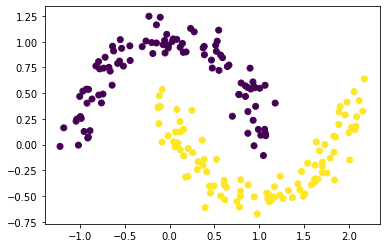

In [9]:
plt.scatter(x[:,0],x[:,1],c=y)

In [10]:
x

array([[ 1.04524549e+00, -1.06228594e-01],
       [ 7.99402029e-02,  1.02216014e+00],
       [ 1.48892435e+00, -5.01534445e-01],
       [ 9.30663360e-01,  2.36337608e-01],
       [ 6.49403131e-02,  1.22325580e-01],
       [ 7.77986561e-01, -6.07254712e-01],
       [ 1.63407182e+00,  2.65329445e-02],
       [ 1.18475254e-01, -4.90420422e-02],
       [ 2.48633846e-01,  3.33057906e-01],
       [ 8.96358245e-01,  7.42722821e-01],
       [ 1.07017259e+00,  8.64568981e-02],
       [ 1.88461163e+00,  1.95641142e-01],
       [-9.94024231e-01,  2.72959376e-01],
       [ 6.61694509e-01,  7.72708656e-01],
       [ 1.67001543e+00, -6.15814200e-02],
       [-1.67867726e-02,  8.63763524e-02],
       [ 4.14060948e-01, -2.63892896e-01],
       [ 1.42950305e+00, -3.80198447e-01],
       [ 9.28700851e-01,  6.09286271e-01],
       [ 3.87717281e-01,  8.72952431e-01],
       [ 1.57898909e+00, -3.91722582e-01],
       [-2.29861770e-01,  1.24722796e+00],
       [ 1.15739302e-01,  2.24948604e-01],
       [-3.

In [11]:
y

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [12]:
result=agglomerativeClustring(x,2)
result

array([0., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 2., 0., 0., 2., 2., 2.,
       2., 0., 0., 2., 0., 2., 0., 0., 0., 0., 2., 2., 2., 0., 2., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 2., 2., 0., 0., 2., 2., 0.,
       2., 0., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0., 0., 0.,
       2., 0., 0., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 0., 2., 2., 0., 0., 0., 2., 0., 2., 2., 0., 2.,
       0., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 0., 2., 2., 2.,
       2., 2., 2., 0., 2., 0., 2., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0.,
       2., 2., 0., 0., 2., 2., 0., 0., 0., 2., 2., 0., 0., 2., 2., 2., 2.,
       0., 0., 2., 0., 2., 2., 0., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0.,
       2., 0., 2., 0., 2., 0., 0., 2., 0., 2., 0., 2., 0., 0., 0., 2., 2.,
       0., 0., 2., 0., 0., 2., 0., 2., 0., 0., 2., 0., 2.])

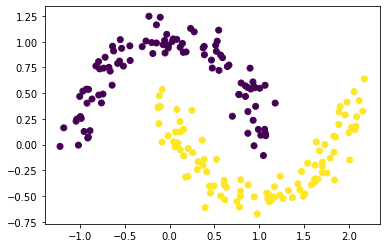

In [13]:
plt.scatter(x[:,0],x[:,1],c=result)